<a href="https://colab.research.google.com/github/AmruthaReddy1397/Detection_of_malaria/blob/main/Malaria_detection_VGG19_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing the kaggle package into colab
! pip install -q kaggle

In [ ]:
#Loading the generated API token which creates a username and key
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amruthareddy","key":"179019c63c6b57e219c57649fe2c1bd6"}'}

In [ ]:
#creating a directory
! mkdir ~/.kaggle

In [ ]:
#copying the json file to the directory
!cp kaggle.json ~/.kaggle/

In [ ]:
#Changing the permission to read and write mode
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading the dataset from Kaggle
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:05<00:00, 131MB/s]
100% 675M/675M [00:06<00:00, 117MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
#Thumbs.db is a database file automatically generated which displays thumbnails.
#removing the thumbs.db file of parasitized folder
!rm /content/cell_images/Parasitized/Thumbs.db

In [ ]:
#removing the thumbs.db file of the Uninfected folder
!rm /content/cell_images/Uninfected/Thumbs.db

In [ ]:
import os 
import cv2 #Python bindings for computer vision
import matplotlib.pyplot as plt #For Data Visualization
from tensorflow.keras.preprocessing.image import ImageDataGenerator #For Data Augumentation

In [ ]:
#os.listdir() lists the files and sub-directories in specified directory
#os.path.join() is used to concatenate paths.
base_path = '/content/cell_images'
print(os.listdir(base_path)) #listing the folders in content/cell_images
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['Uninfected', 'Parasitized', 'cell_images']
Total Parasitized images 13779
Total Uninfected images 13779


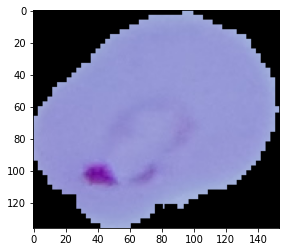

In [ ]:
DATADIR = "/content/cell_images"

CATEGORIES = ["Parasitized", "Uninfected"]

for category in CATEGORIES:  # do Parasitized and Uninfected
    path = os.path.join(DATADIR,category)  # create path to Parasitized and Uninfected
    for img in os.listdir(path):  # iterate over each image per Parasitized and Uninfected
        img_data = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_data, cmap='gray')  # graph it
        plt.show()  # display
        break
    break

In [ ]:
#Installing split-folders which is used to split a folder to train, validation and test data folders
!pip install split-folders

In [ ]:
# splitting the data into train, validation and test set
import splitfolders
os.mkdir('images')  # directory to store the Training, Validation and Testing datasets
input_folder = os.path.join(base_path, 'cell_images')
output_folder = 'images'
splitfolders.ratio(input_folder, output=output_folder, seed=10, ratio=(.70, .15, .15), group_prefix=None) # default values

Copying files: 27560 files [00:03, 6953.68 files/s]


In [ ]:
# checking the newly created directory structure
input_path = 'images'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

test
['Uninfected', 'Parasitized']
train
['Uninfected', 'Parasitized']
val
['Uninfected', 'Parasitized']


In [ ]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')

In [ ]:
print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 9646
total training Uninfected images : 9646
total validation Parasitized images : 2067
total validation Uninfected images : 2067
total test Parasitized images : 2067
total test Uninfected images : 2067


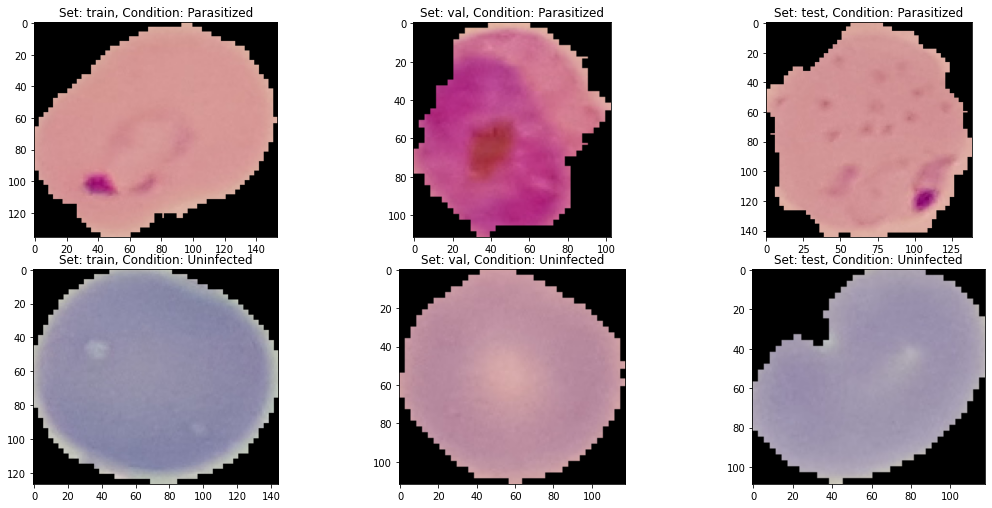

In [ ]:
input_path = 'images/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Parasitized/'+os.listdir(set_path+'/Parasitized')[0]))
    ax[i].set_title('Set: {}, Condition: Parasitized'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Uninfected/'+os.listdir(set_path+'/Uninfected')[0]))
    ax[i+3].set_title('Set: {}, Condition: Uninfected'.format(_set))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
pre_trained_model = VGG19(
    input_shape=(150, 150, 3), include_top=False, weights='imagenet')

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('block4_pool')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 9, 9, 512)


In [ ]:
# Summary of the model 
print(pre_trained_model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
x = layers.Flatten()(last_output)
# Add two fully connected layers with 4096 hidden units and ReLU activation
x = layers.Dense(4096, activation='relu',name = 'fc1')(x)
x = layers.Dense(4096, activation='relu',name = 'fc2')(x)
# Add a final sigmoid layer for binary classification
x = layers.Dense(1, kernel_regularizer = l2(0.001), activation='linear',name = 'predictions')(x)
# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='hinge',
              optimizer= 'adam',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('images/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 19290 images belonging to 2 classes.


In [ ]:
validation_set = val_datagen.flow_from_directory('images/val',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4134 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('images/test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4134 images belonging to 2 classes.


In [ ]:
print(len(validation_set))

130


In [ ]:
import math
tma = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=5,
  steps_per_epoch=math.ceil(len(training_set)/32),
  validation_steps=len(validation_set))

Epoch 1/5
19/19 [==============================] - 14s 737ms/step - loss: 0.3507 - acc: 0.8701 - val_loss: 0.2677 - val_acc: 0.8776
Epoch 2/5
19/19 [==============================] - 14s 758ms/step - loss: 0.3323 - acc: 0.8668 - val_loss: 0.2483 - val_acc: 0.8861
Epoch 3/5
19/19 [==============================] - 14s 767ms/step - loss: 0.2903 - acc: 0.8766 - val_loss: 0.2275 - val_acc: 0.9064
Epoch 4/5
19/19 [==============================] - 14s 746ms/step - loss: 0.2950 - acc: 0.8734 - val_loss: 0.2147 - val_acc: 0.9219
Epoch 5/5
19/19 [==============================] - 13s 721ms/step - loss: 0.2446 - acc: 0.9178 - val_loss: 0.4847 - val_acc: 0.8679


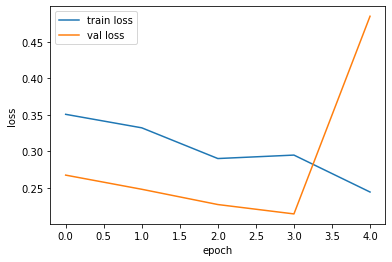

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(tma.history['loss'], label='train loss')
plt.plot(tma.history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('LossVal_loss')

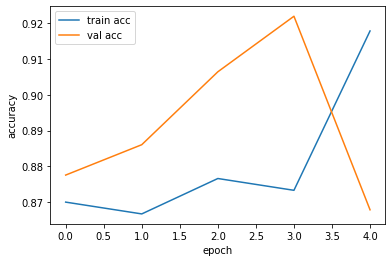

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(tma.history['acc'], label='train acc')
plt.plot(tma.history['val_acc'], label='val acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
val = model.evaluate(test_set)

130/130 [==============================] - 10s 74ms/step - loss: 0.4902 - acc: 0.8689


In [ ]:
print("test loss: ",val[0])
print("test accuracy: ",val[1])

test loss:  0.4902293086051941
test accuracy:  0.8688921332359314
